<a href="https://colab.research.google.com/github/souzajvp/IA_tutorials/blob/main/diabetes_class/Classification_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports, versions and functions

## Imports

In [1]:
# pandas is a package most used for managing and organizing data
import pandas as pd
# numpy is a package used for numerical operations
import numpy as np
# matplotlib and seaborn are packages for ploting graphs
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## Versions

In [6]:
# Python version in use
!python --version

Python 3.7.10


In [4]:
print('The Pandas version utilized in this example is -',pd.__version__)
print('The Matplotlib version utilized in this example is -',mpl.__version__)
print('The Seaborn version utilized in this example is -',sns.__version__)
print('The Numpy version utilized in this example is -',np.__version__)

The Pandas version utilized in this example is - 1.1.5
The Matplotlib version utilized in this example is - 3.2.2
The Seaborn version utilized in this example is - 0.11.1
The Numpy version utilized in this example is - 1.19.5


## Functions

# Data 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are **females at least 21 years old** of Pima Indian heritage.

This dataset can be found on [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [8]:
# The dataset can be loaded directly from my github
url = 'https://github.com/souzajvp/IA_tutorials/blob/main/diabetes_class/archive.zip?raw=true'

In [11]:
# reading the dataset using pd.read_csv from pandas
# it is necessary to specify the compression.
diabetes = pd.read_csv(url, compression='zip')

## Overview

In [15]:
# The .head() method show the first 5 rows of data
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Looking to the shape of the dataset

In [16]:
diabetes.shape
# There are 768 rows and 9 columns

(768, 9)

### Checking Null values

In [ ]:
# the .isna().sum() methods aggregates the null values for every column
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

At first it seems that we do not have any missing value. But if we look closely, there are several 0 values for many variables.
***

While it makes sense that variables such as `Pregnancy` have values set as 0, the **remaining variables with values = 0 might represent missing information**

In [23]:
# Here I decided to replace values set as 0 for NaN.
# This was done for all columns, except Pregnancies and Outcome
diabetes[diabetes.columns[1:-1]] = diabetes[diabetes.columns[1:-1]].replace([0], [np.nan])

Now, looking at the null values we not how there are missing values

In [24]:
diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
to_inspect = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
def print_length_zeroes(lista_variaveis, dataframe):
  for i in lista_variaveis:
    print(f"Variable {i} has {len(dataframe[dataframe[i].isna()==True])} values as Null")

def get_indexes_not_ambiguous(lista_variaveis, dataframe):
  indexes = []
  for i in lista_variaveis:
    indexes += dataframe[dataframe[i].isna()==True].index.tolist()
  return set(indexes)

print_length_zeroes(to_inspect, diabetes)

Variable Glucose has 5 values as Null
Variable BloodPressure has 35 values as Null
Variable SkinThickness has 227 values as Null
Variable BMI has 11 values as Null
Variable Insulin has 374 values as Null


In [28]:
indexes = get_indexes_not_ambiguous(to_inspect, diabetes)
print(f"There are {len(indexes)} unambiguous rows with value zero")

There are 376 unambiguous rows with value zero


### Decisions
Considering the null values, i could decided to remove those patients from analysis

In [41]:
# Here I create a copy of the diabetes dataset. after removing rows with missing
# data
diabetes_copy = diabetes.drop(indexes, axis=0).copy()

In [31]:
diabetes.corrwith(diabetes['Outcome'], method='spearman')

Pregnancies                 0.198689
Glucose                     0.483364
BloodPressure               0.177227
SkinThickness               0.265397
Insulin                     0.377300
BMI                         0.309324
DiabetesPedigreeFunction    0.175353
Age                         0.309040
Outcome                     1.000000
dtype: float64

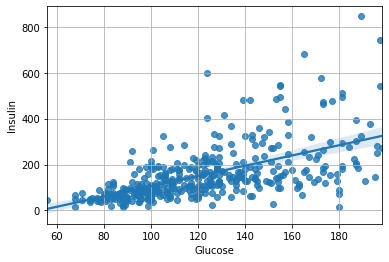

In [45]:
sns.regplot(x='Glucose', y='Insulin', data=diabetes_copy)
plt.grid()

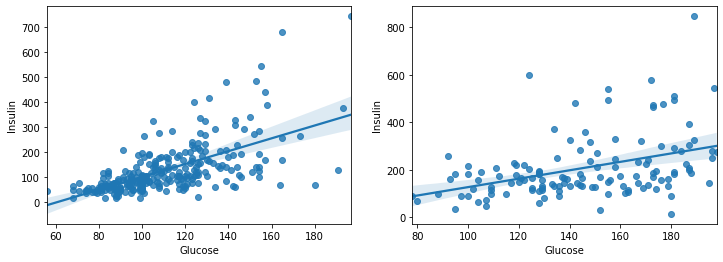

In [50]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
nao_diabetes = diabetes_copy.query('Outcome == 0')
tem_diabetes = diabetes_copy.query('Outcome == 1')

sns.regplot(x='Glucose', y='Insulin', data=nao_diabetes, ax=ax[0])
sns.regplot(x='Glucose', y='Insulin', data=tem_diabetes, ax=ax[1])

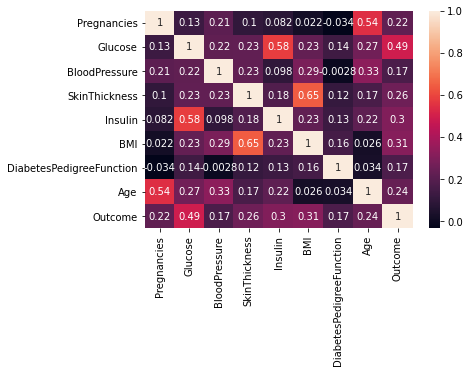

In [39]:
sns.heatmap(diabetes.corr(), annot=True)

In [34]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000
1,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164


<BarContainer object of 768 artists>

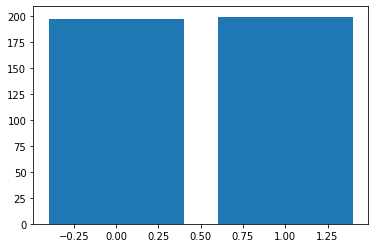

In [33]:
plt.bar(diabetes['Outcome'], diabetes['Glucose'])

##Distribution

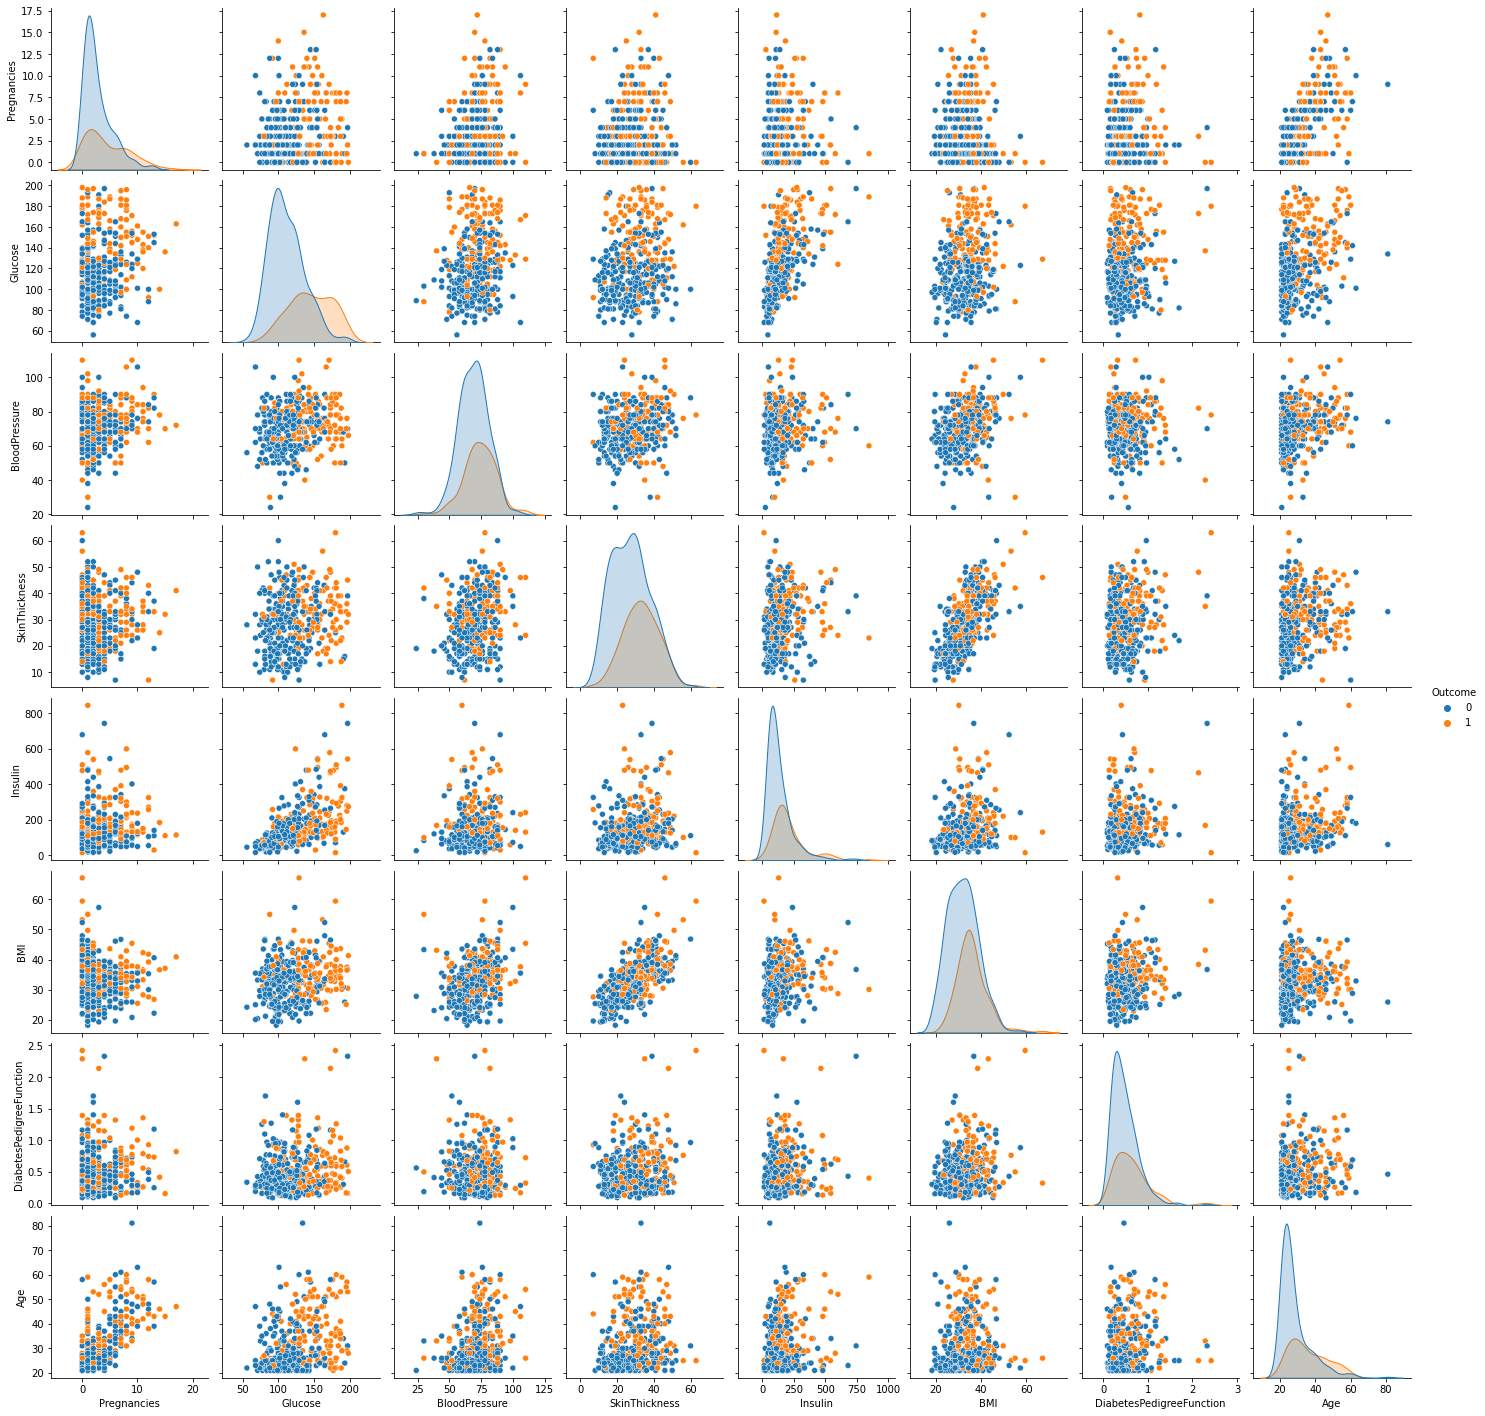

In [42]:
from pandas.plotting import scatter_matrix
sns.pairplot(diabetes_copy, hue='Outcome')

## Correlation

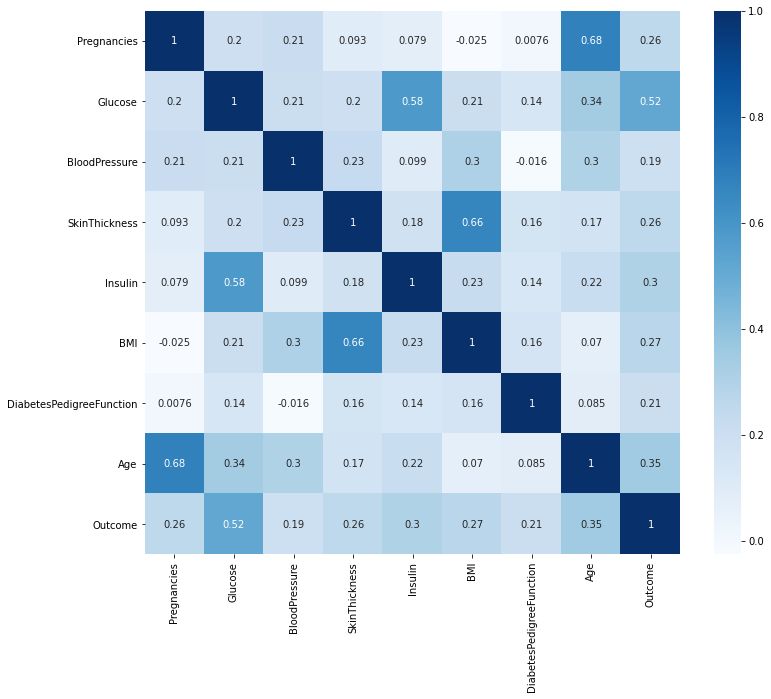

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_copy.corr(), annot=True,cmap ='Blues')

### To accurately evaluate the relationship of the attributes with our Outcome, we could:
1. Run chi² squared test for **categorical** x **categorical**;

Pregnancies x Outcome

2. Run T-test or Mann-Whitney test for **numeric** x **categorical** - 2 groups;

Age x Outcome

3. Run pearson correlation to compare **numeric** x **numeric**.

Age x Insulin

## Models!

Class balance

In [ ]:
diabetes_copy['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

Text(0.5, -0.3, 'Class balance in the dataset after cleaning')

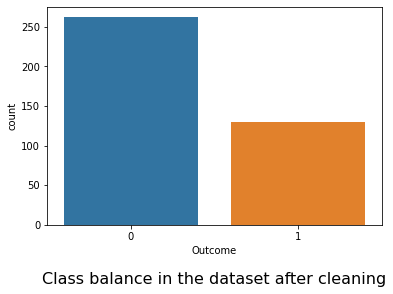

In [ ]:
sns.countplot(data=diabetes_copy, x='Outcome')
plt.title('Class balance in the dataset after cleaning',y=-0.3, fontsize=16)

## Data spliting
1. Train - 70%;
2. Validation - 10%;
3. Test - 20%

**Obs**: Considering the small ammounts of data we have, creating three sets probably would not be as effective

In [ ]:
# X attribute matrix
X = diabetes_copy.iloc[:,:-1].values.copy()
# y Outcome
y = diabetes_copy['Outcome'].values.copy()

### Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-0.7174265 , -1.09104581, -0.37365481, ..., -0.710421  ,
        -1.03187632, -0.9682991 ],
       [-1.02921274,  0.46631407, -2.45696436, ...,  1.42673006,
         5.11511079,  0.2095853 ],
       [-0.09385402, -1.44794079, -1.65569146, ..., -0.29723846,
        -0.79712575, -0.47751393],
       ...,
       [-0.40564026, -1.12349081, -1.01467313, ..., -0.66767798,
         0.70411863, -0.87014206],
       [ 2.08864966, -0.70170584,  0.42761809, ..., -0.02653266,
        -1.0202837 ,  3.15429628],
       [ 0.52971846, -0.05280589,  0.10710893, ..., -0.9811268 ,
        -0.80582021, -0.0848858 ]])

### Splting randomly

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit = LogisticRegression()

### Fitting the data - Training the model

In [ ]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions on our Train set

In [ ]:
y_train_pred = logit.predict(X_train)

Using accuracy, precision and recall!!!

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
scores_random = [
                 'random', 
                 accuracy_score(y_train, y_train_pred),
                 precision_score(y_train, y_train_pred),
                 recall_score(y_train, y_train_pred),
                 ]

### Testing a different and more robust way of data spliting - Stratified K Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
skf.get_n_splits(X, y)

3

In [ ]:
accuracy = []
precision = []
recall = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logit.fit(X_train, y_train)
    y_train_pred = logit.predict(X_train)
    accuracy.append(accuracy_score(y_train, y_train_pred))
    precision.append(precision_score(y_train, y_train_pred))
    recall.append(recall_score(y_train, y_train_pred))

scores_stratified = ['stratified', np.mean(accuracy), np.mean(precision), np.mean(recall)]

### Evaluating the model with different splits

In [ ]:
results = pd.DataFrame(columns=['type', 'Accuracy', 'Precision', 'Recall'],
             data=[scores_random, scores_stratified])
results

,type,Accuracy,Precision,Recall
0,random,0.795527,0.740741,0.582524
1,stratified,0.795916,0.738819,0.596186


Cross validation

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
accuracy = []
precision = []
recall = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train_pred = cross_val_predict(logit, X_train, y_train, cv=3,
                                n_jobs=-1)
    accuracy.append(accuracy_score(y_train, y_train_pred))
    precision.append(precision_score(y_train, y_train_pred))
    recall.append(recall_score(y_train, y_train_pred))


scores_cv = ['cv', np.mean(accuracy), np.mean(precision), np.mean(recall)]
results.loc['2'] = scores_cv

In [ ]:
results

,type,Accuracy,Precision,Recall
0,random,0.795527,0.740741,0.582524
1,stratified,0.795916,0.738819,0.596186
2,cv,0.785709,0.717036,0.584648


# Testing the random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
accuracy = []
precision = []
recall = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    accuracy.append(accuracy_score(y_train, y_train_pred))
    precision.append(precision_score(y_train, y_train_pred))
    recall.append(recall_score(y_train, y_train_pred))


scores_rf = ['random_forest', np.mean(accuracy), np.mean(precision), np.mean(recall)]
results.loc['3'] = scores_rf

In [ ]:
results

,type,Accuracy,Precision,Recall
0,random,0.795527,0.740741,0.582524
1,stratified,0.795916,0.738819,0.596186
2,cv,0.785709,0.717036,0.584648
3,random_forest,1.000000,1.000000,1.000000


# Overfit?

In [ ]:
accuracy = []
precision = []
recall = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    y_test_pred = rf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_test_pred))
    precision.append(precision_score(y_test, y_test_pred))
    recall.append(recall_score(y_test, y_test_pred))

scores_rf_test = ['random_forest_test', np.mean(accuracy), np.mean(precision), np.mean(recall)]
results.loc['4'] = scores_rf_test

In [ ]:
results

,type,Accuracy,Precision,Recall
0,random,0.795527,0.740741,0.582524
1,stratified,0.795916,0.738819,0.596186
2,cv,0.785709,0.717036,0.584648
3,random_forest,1.000000,1.000000,1.000000
4,random_forest_test,0.785633,0.722493,0.584214
